### __고급대기과학 파이썬 실습 두번째__

## __1. NetCDF 파일 읽기-GK2A level-1b__ (@Yeji Choi)
### 2022.03.26

### __1. Library import__   
__netCDF4__: netCDF4 파일을 처리할 수 있도록 지원

In [1]:
import numpy as np
from netCDF4 import Dataset

### __3. NC file read__

- 파일 경로와 파일 이름을 지정하여 파일 읽기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
nc_path='/content/drive/MyDrive/Colab Notebooks/'
nc_fname='gk2a_ami_le1b_ir105_ea020lc_202104010000.nc'

nc=Dataset(nc_path+nc_fname,'r', format='netcdf4')

- 읽어온 파일 정보 확인

In [4]:
print(nc)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    projection_type: lambert_conformal_conic
    standard_parallel1: 30.0
    standard_parallel2: 60.0
    origin_latitude: 38.0
    central_meridian: 126.0
    false_easting: 0.0
    false_northing: 0.0
    image_width: 3000
    image_height: 2600
    pixel_size: 2000.0
    upper_left_easting: -2999000.0
    upper_left_northing: 2599000.0
    upper_right_easting: 2999000.0
    upper_right_northing: 2599000.0
    lower_left_easting: -2999000.0
    lower_left_northing: -2599000.0
    lower_right_easting: 2999000.0
    lower_right_northing: -2599000.0
    _CoordinateTransformType: 0.0
    _CoordinateAxisTypes: 0.0
    file_name: gk2a_ami_le1b_ir105_ea020lc_202104010000.nc
    origianl_sourece_file: gk2a_ami_le1b_ir105_fd020ge_202104010000.nc
    number_of_columns: 3000
    number_of_lines: 2600
    total_pixel_data_size: 7800000
    channel_center_wavelength: 10.5
    channel_spatial_resolution: 2.0
   

- 데이터 값 불러오기

In [5]:
ncdata=nc['image_pixel_values'] #data=nc.variables['image_pixel_values']와 같음
ncdata

<class 'netCDF4._netCDF4.Variable'>
uint16 image_pixel_values(dim_y, dim_x)
    number_of_total_pixels: 7800000
    average_pixel_value: 11278.503699636363
    channel_name: IR105
    max_pixel_value: 32768
    min_pixel_value: 2158
    number_of_total_bits_per_pixel: 16
    number_of_valid_bits_per_pixel: 13
unlimited dimensions: 
current shape = (2600, 3000)
filling on, default _FillValue of 65535 used

In [6]:
data=nc.variables['image_pixel_values'][:,:]
data

masked_array(
  data=[[5933, 5926, 5938, ..., 6160, 6504, 6697],
        [5934, 5926, 5938, ..., 6346, 6504, 6835],
        [5934, 5933, 5938, ..., 6346, 6792, 6835],
        ...,
        [4809, 4667, 4617, ..., 3228, 3231, 3231],
        [4541, 4667, 4772, ..., 3228, 3231, 3233],
        [4458, 4541, 4737, ..., 3225, 3231, 3234]],
  mask=False,
  fill_value=999999,
  dtype=uint16)

In [7]:
data.shape

(2600, 3000)

In [8]:
np.min(data), np.max(data)

(2813, 7630)

### __4. Data check__  

#### __Histogram을 이용하여 자료 값의 분포 확인__   

- library import

In [9]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip uninstall shapely
!pip install shapely --no-binary shapely

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
proj-data is already the newest version (4.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Found existing installation: Shapely 1.8.1.post1
Uninstalling Shapely-1.8.1.post1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Shapely-1.8.1.post1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/shapely/*
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.8.1.post1
  Using cached Shapely-1.8.1.post1.tar.gz (198 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done

In [47]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings(action='ignore')

In [11]:
data_1d=data.flatten()
data_1d.shape

(7800000,)

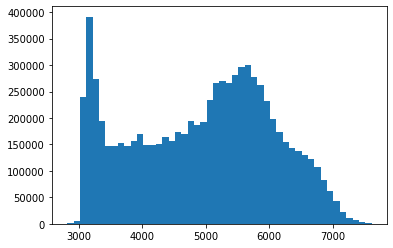

In [12]:
plt.hist(data_1d, bins=range(np.min(data),np.max(data), 100))
plt.show()

- 값 변환하기 (gk2a user manual 참고)

In [13]:
mask = 0b0001111111111111 #13bit mask
ipixel_process_masked=np.bitwise_and(data,mask)

In [14]:
np.bitwise_and(13, 17) 

#숫자 13은 00001101 로 표시됩니다 . 마찬가지로 17은 00010001 로 표시됩니다 .
#따라서 13과 17의 비트 AND는 000000001 또는 1입니다.

1

In [15]:
CT_path='/content/drive/MyDrive/Colab Notebooks/ct_table/'
AL_postfix='_con_alb.txt'
BT_postfix='_con_bt.txt'

channel=ncdata.getncattr('channel_name')
print(channel)

conversion_table=np.loadtxt(CT_path+channel+BT_postfix,'float64')

IR105


In [16]:
data_converted=conversion_table[ipixel_process_masked]
data_converted.shape, np.min(data_converted), np.max(data_converted)

((2600, 3000), 200.110592, 300.241644)

(array([1.20000e+01, 2.30000e+01, 5.20000e+01, 2.85000e+02, 4.79000e+02,
        5.71000e+02, 6.19000e+02, 7.08000e+02, 9.21000e+02, 1.14700e+03,
        1.14300e+03, 1.39100e+03, 1.48400e+03, 1.75200e+03, 2.00200e+03,
        1.89600e+03, 2.54800e+03, 3.41300e+03, 4.73200e+03, 5.35500e+03,
        6.79900e+03, 7.67200e+03, 9.96900e+03, 1.22730e+04, 1.47860e+04,
        1.80690e+04, 1.91210e+04, 2.04380e+04, 2.44420e+04, 2.76780e+04,
        2.94330e+04, 3.25540e+04, 3.56120e+04, 4.12160e+04, 4.44420e+04,
        4.46490e+04, 4.72460e+04, 5.01400e+04, 5.05250e+04, 5.34730e+04,
        5.48050e+04, 5.82490e+04, 5.76240e+04, 6.17320e+04, 6.39810e+04,
        6.83190e+04, 7.19380e+04, 7.66850e+04, 8.32720e+04, 8.87750e+04,
        9.72300e+04, 1.06542e+05, 1.16044e+05, 1.26847e+05, 1.31598e+05,
        1.36574e+05, 1.46393e+05, 1.55403e+05, 1.57125e+05, 1.60350e+05,
        1.54795e+05, 1.55006e+05, 1.53923e+05, 1.48857e+05, 1.51525e+05,
        1.56131e+05, 1.58898e+05, 1.50865e+05, 1.48

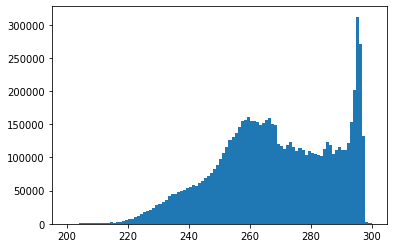

In [17]:
plt.hist(data_converted.flatten(), bins=range(200, 301, 1))

#### __2D 이미지로 쓱 확인하기__  

_*Histogram그릴때 사용했던 matplotlib을 그대로 사용_ 

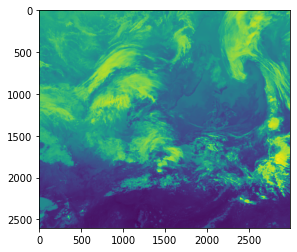

In [18]:
plt.imshow(data)

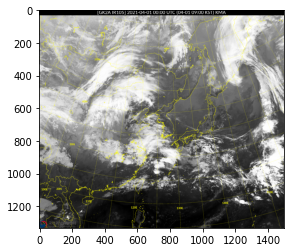

In [19]:
from PIL import Image
 
im = Image.open(nc_path+"gk2a_ami_le1b_ir105_ea020lc_202104010000.srv.png")
plt.imshow(im)
plt.show()

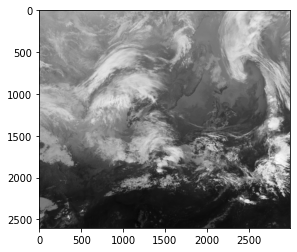

In [20]:
plt.imshow(data, cmap='gray')
plt.show()

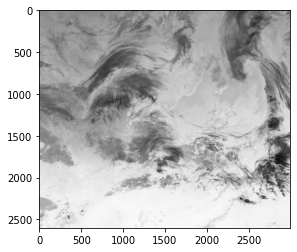

In [21]:
plt.imshow(data_converted, cmap='gray')
plt.show()

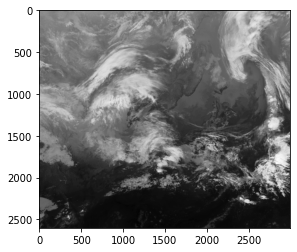

In [22]:
plt.imshow(data_converted, cmap='Greys')
plt.show()

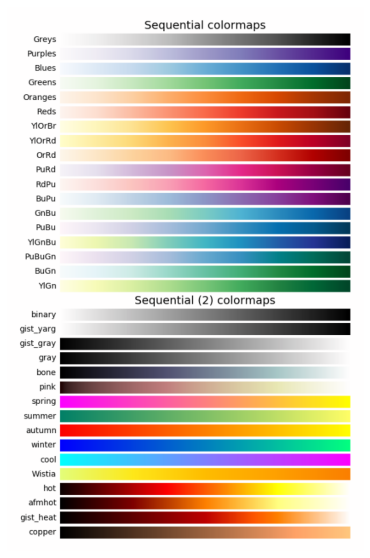

In [23]:
fig = plt.figure(figsize=(15,10))
im = Image.open(nc_path+"cmap2.png")
plt.imshow(im)
plt.axis("off")
plt.show()

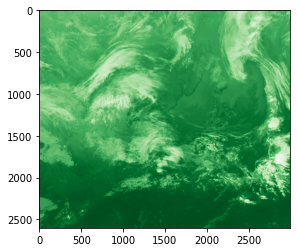

In [24]:
plt.imshow(data_converted, cmap='Greens')
plt.show()

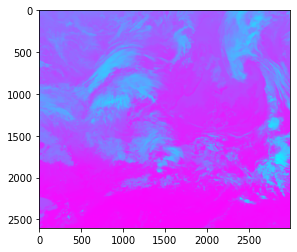

In [25]:
plt.imshow(data_converted, cmap='cool')
plt.show()

### __5. Data statistics__   
- 통계분석을 위한 Library install  
`
conda install -c anaconda scipy
`   
  
- Library import

In [26]:
from scipy.stats import mode

- 최대, 최소, 평균, 중앙값

In [27]:
np.min(data_converted), np.max(data_converted), np.mean(data_converted), np.median(data_converted)

(200.110592, 300.241644, 268.6703939600245, 268.194457)

In [28]:
np.min(data), np.max(data), np.mean(data), np.median(data)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


(2813, 7630, 4936.771160641026, 5094.0)

- 분산, 표준편차

In [29]:
np.var(data_converted), np.std(data_converted)

(362.28468315868207, 19.033777427475663)

- 사분위값

In [30]:
np.quantile(data_converted, .25), np.quantile(data_converted, .75)

(255.482889, 285.358455)

- 최빈값

In [31]:
mode(data_converted)

ModeResult(mode=array([[254.243886, 268.597402, 252.633752, ..., 295.219071, 295.168646,
        295.558809]]), count=array([[10, 12,  8, ..., 12, 10, 11]]))

### __6. plot for presentation and paper__   


In [32]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

- 위/경도 읽기

In [33]:
geo_name='gk2a_latlon_ea_2000.bin'

with open(nc_path+geo_name,'rb') as f:
    nx, ny =  3000, 2600
    latlon = np.fromfile(f, dtype='float', count=nx*ny*2)

print(latlon.shape)

(15600000,)


In [34]:
latlon=np.reshape(latlon, (ny,nx,2))

lat_arr=latlon[:,:,0]
lon_arr=latlon[:,:,1]

np.min(lat_arr[:,0]), np.min(lat_arr[:,1]), np.max(lat_arr), np.min(lon_arr), np.max(lon_arr)

(11.30853, 11.31335, 61.93105, 76.81183, 175.18817)

- 투영법 별 지도 그리기


1. LambertConformal

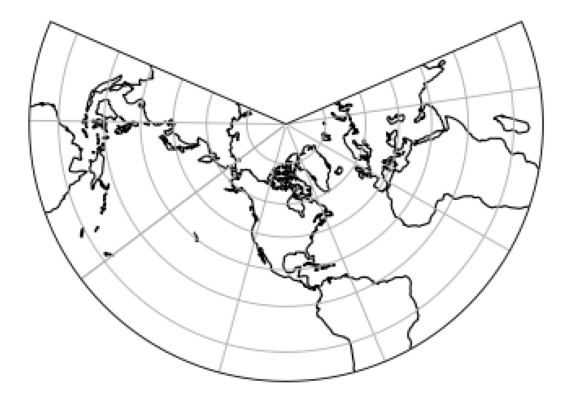

In [35]:
im = Image.open(nc_path+"LambertConformal.png")
fig = plt.figure(figsize=(10,10))
plt.imshow(im)
plt.axis("off")
plt.show()

2. PlateCarree

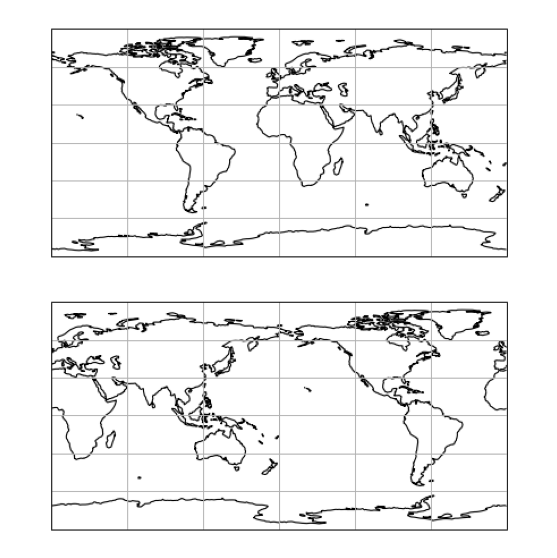

In [36]:
im = Image.open(nc_path+"PlateCarree.png")
fig = plt.figure(figsize=(15,10))
plt.imshow(im)
plt.axis("off")
plt.show()

3. Mercator

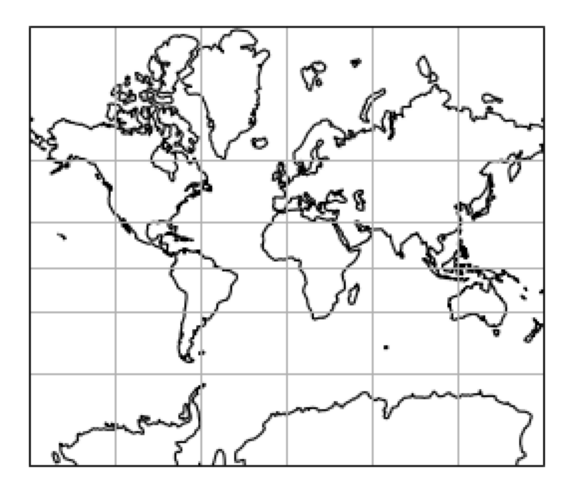

In [37]:
im = Image.open(nc_path+"mercator.png")
fig = plt.figure(figsize=(10,10))
plt.imshow(im)
plt.axis("off")
plt.show()

4. Robinson

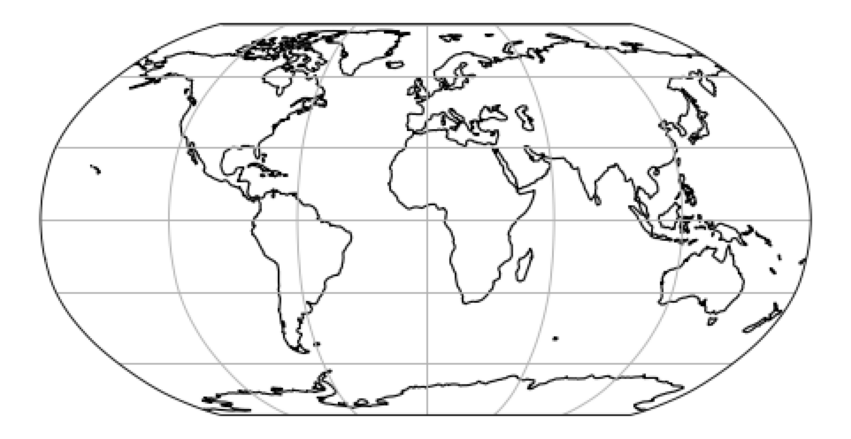

In [38]:
im = Image.open(nc_path+"robinson.png")
fig = plt.figure(figsize=(15,10))
plt.imshow(im)
plt.axis("off")
plt.show()

## __정리된 지도 그리고 저장하기__

- 지도영역 선택하기, color bar 삽입하기, 제목 넣기

In [39]:
lon_arr.shape, lat_arr.shape

((2600, 3000), (2600, 3000))

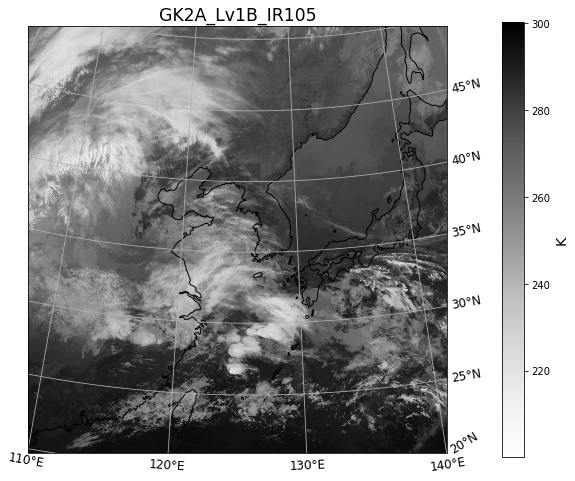

In [48]:
fig = plt.figure(figsize=(10,10))

p = ccrs.LambertConformal(central_longitude=126, central_latitude=38.0,globe=None)
ax = plt.axes(projection=p)
cf1 = ax.pcolormesh(lon_arr, lat_arr, data_converted, cmap='Greys', transform=ccrs.PlateCarree())
ax.coastlines()

ax.set_extent([110,140,20,50])
ax.set_title("GK2A_Lv1B_"+channel, size='xx-large')

cbar = plt.colorbar(cf1, orientation="vertical", pad=0.1,shrink=0.8)
cbar.set_label('K', size='x-large')

gl=ax.gridlines(draw_labels=True,x_inline=False, y_inline=False)
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
plt.show()

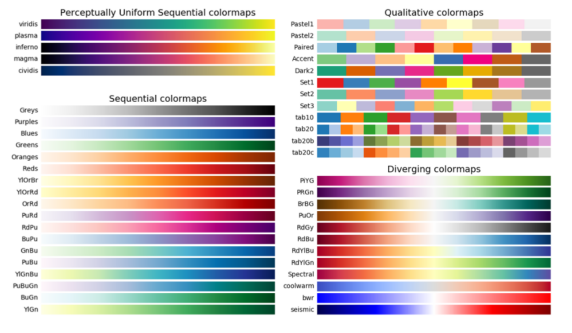

In [43]:
im = Image.open(nc_path+"cmap.png")
fig = plt.figure(figsize=(10,10))
plt.imshow(im)
plt.axis("off")
plt.show()

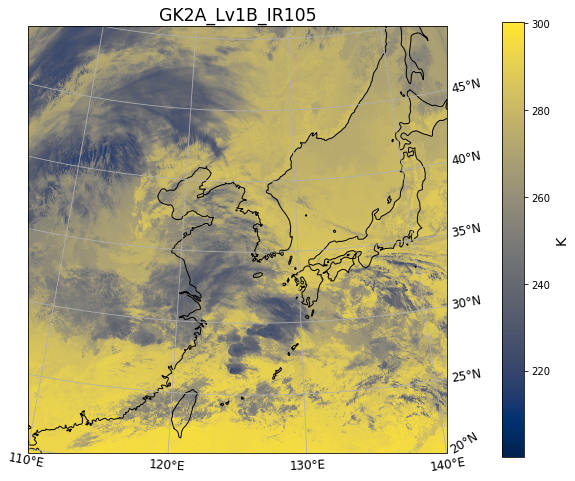

In [49]:
fig = plt.figure(figsize=(10,10))

p = ccrs.LambertConformal(central_longitude=126, central_latitude=38.0,globe=None)
ax = plt.axes(projection=p)
cf1 = ax.pcolormesh(lon_arr, lat_arr, data_converted, cmap='cividis', transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([110,140,20,50])
ax.set_title("GK2A_Lv1B_"+channel, size='xx-large')

cbar = plt.colorbar(cf1, orientation="vertical", pad=0.1,shrink=0.8)
cbar.set_label('K', size='x-large')

gl=ax.gridlines(draw_labels=True,x_inline=False, y_inline=False)
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
plt.show()

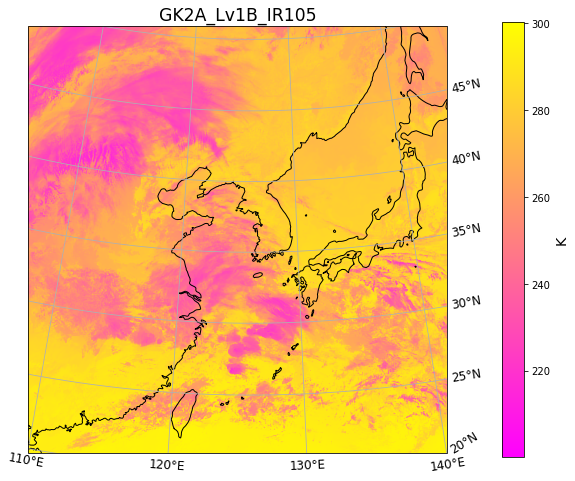

In [50]:
fig = plt.figure(figsize=(10,10))

p = ccrs.LambertConformal(central_longitude=126, central_latitude=38.0,globe=None)
ax = plt.axes(projection=p)
cf1 = ax.pcolormesh(lon_arr, lat_arr, data_converted, cmap='spring', transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([110,140,20,50])
ax.set_title("GK2A_Lv1B_"+channel, size='xx-large')

cbar = plt.colorbar(cf1, orientation="vertical", pad=0.1,shrink=0.8)
cbar.set_label('K', size='x-large')

gl=ax.gridlines(draw_labels=True,x_inline=False, y_inline=False)
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
plt.show()

- Colorbar 만들기

### RGB 색상과 16진수 색상 코드(HEX 색상 코드)
16진수 2자리는 16 * 16 = 256 이므로 16진수 2자리당 0-255의 범위를 표현할 수 있음.  

참고 : 16진수 색상 코드는 앞에 # 이 붙습니다.  
https://www.ltool.net/html-color-charts-rgb-color-table-in-korean.php

strip([chars]) : 인자로 전달된 문자를 String의 왼쪽과 오른쪽에서 제거합니다.  
lstrip([chars]) : 인자로 전달된 문자를 String의 왼쪽에서 제거합니다.  
rstrip([chars]) : 인자로 전달된 문자를 String의 오른쪽에서 제거합니다.

In [51]:
import matplotlib.colors as mcolors

def hex_to_rgb(value):
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    return [v/256 for v in value]

def get_continuous_cmap(hex_list, float_list=None):
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    print(np.array(rgb_list).shape)
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp


In [56]:
print(int())  # 0
print(int(11))  # 11
print(int('11', 2))  # 11(2) = 2 + 1 = 3
print(int('1a', 16))  # 1a(16) = 16 + 10 = 26
print(int('1c', 16))  # 1c(16) = 16  + 12 = 28

0
11
3
26
28


In [82]:
hex_list = ['#0091ad', '#3fcdda', '#83f9f8', '#d6f6eb', '#fdf1d2', '#f8eaad', '#faaaae', '#ff57bb']

In [83]:
rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
rgb_list

[[0.0, 0.56640625, 0.67578125],
 [0.24609375, 0.80078125, 0.8515625],
 [0.51171875, 0.97265625, 0.96875],
 [0.8359375, 0.9609375, 0.91796875],
 [0.98828125, 0.94140625, 0.8203125],
 [0.96875, 0.9140625, 0.67578125],
 [0.9765625, 0.6640625, 0.6796875],
 [0.99609375, 0.33984375, 0.73046875]]

In [84]:
float_list = list(np.linspace(0,1,len(rgb_list)))
float_list

[0.0,
 0.14285714285714285,
 0.2857142857142857,
 0.42857142857142855,
 0.5714285714285714,
 0.7142857142857142,
 0.8571428571428571,
 1.0]

In [85]:
float_list[0] #, rgb_list[0][0]

0.0

In [86]:
cdict = dict()
for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        print('col_list = ',col_list)
        cdict[col] = col_list
cdict

col_list =  [[0.0, 0.0, 0.0], [0.14285714285714285, 0.24609375, 0.24609375], [0.2857142857142857, 0.51171875, 0.51171875], [0.42857142857142855, 0.8359375, 0.8359375], [0.5714285714285714, 0.98828125, 0.98828125], [0.7142857142857142, 0.96875, 0.96875], [0.8571428571428571, 0.9765625, 0.9765625], [1.0, 0.99609375, 0.99609375]]
col_list =  [[0.0, 0.56640625, 0.56640625], [0.14285714285714285, 0.80078125, 0.80078125], [0.2857142857142857, 0.97265625, 0.97265625], [0.42857142857142855, 0.9609375, 0.9609375], [0.5714285714285714, 0.94140625, 0.94140625], [0.7142857142857142, 0.9140625, 0.9140625], [0.8571428571428571, 0.6640625, 0.6640625], [1.0, 0.33984375, 0.33984375]]
col_list =  [[0.0, 0.67578125, 0.67578125], [0.14285714285714285, 0.8515625, 0.8515625], [0.2857142857142857, 0.96875, 0.96875], [0.42857142857142855, 0.91796875, 0.91796875], [0.5714285714285714, 0.8203125, 0.8203125], [0.7142857142857142, 0.67578125, 0.67578125], [0.8571428571428571, 0.6796875, 0.6796875], [1.0, 0.730468

{'blue': [[0.0, 0.67578125, 0.67578125],
  [0.14285714285714285, 0.8515625, 0.8515625],
  [0.2857142857142857, 0.96875, 0.96875],
  [0.42857142857142855, 0.91796875, 0.91796875],
  [0.5714285714285714, 0.8203125, 0.8203125],
  [0.7142857142857142, 0.67578125, 0.67578125],
  [0.8571428571428571, 0.6796875, 0.6796875],
  [1.0, 0.73046875, 0.73046875]],
 'green': [[0.0, 0.56640625, 0.56640625],
  [0.14285714285714285, 0.80078125, 0.80078125],
  [0.2857142857142857, 0.97265625, 0.97265625],
  [0.42857142857142855, 0.9609375, 0.9609375],
  [0.5714285714285714, 0.94140625, 0.94140625],
  [0.7142857142857142, 0.9140625, 0.9140625],
  [0.8571428571428571, 0.6640625, 0.6640625],
  [1.0, 0.33984375, 0.33984375]],
 'red': [[0.0, 0.0, 0.0],
  [0.14285714285714285, 0.24609375, 0.24609375],
  [0.2857142857142857, 0.51171875, 0.51171875],
  [0.42857142857142855, 0.8359375, 0.8359375],
  [0.5714285714285714, 0.98828125, 0.98828125],
  [0.7142857142857142, 0.96875, 0.96875],
  [0.8571428571428571, 0.97

(8, 3)


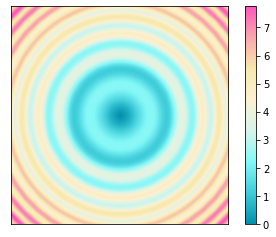

In [87]:

x, y = np.mgrid[-5:5:0.05, -5:5:0.05]
z = (np.sqrt(x**2 + y**2) + np.sin(x**2 + y**2))
hex_list = ['#0091ad', '#3fcdda', '#83f9f8', '#d6f6eb', '#fdf1d2', '#f8eaad', '#faaaae', '#ff57bb']

fig, ax = plt.subplots(1,1)
im = ax.imshow(z, cmap=get_continuous_cmap(hex_list))
fig.colorbar(im)
ax.yaxis.set_major_locator(plt.NullLocator()) # remove y axis ticks
ax.xaxis.set_major_locator(plt.NullLocator()) # remove x axis ticks
plt.show()
#reference - https://towardsdatascience.com/beautiful-custom-colormaps-with-matplotlib-5bab3d1f0e72 

(8, 3)


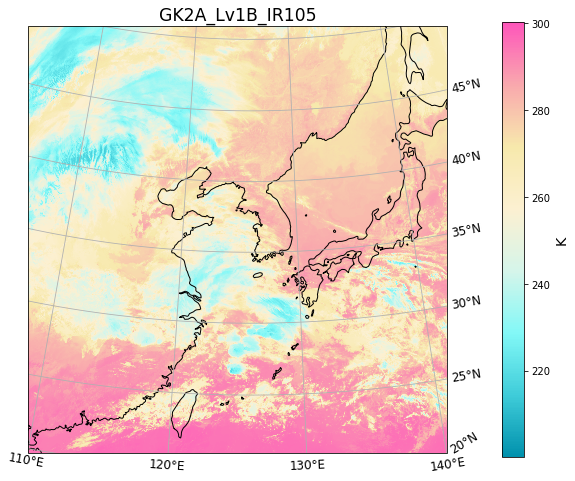

In [89]:
fig = plt.figure(figsize=(10,10))

p = ccrs.LambertConformal(central_longitude=126, central_latitude=38.0,globe=None)
ax = plt.axes(projection=p)
cf1 = ax.pcolormesh(lon_arr, lat_arr, data_converted, cmap=get_continuous_cmap(hex_list), transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([110,140,20,50])
ax.set_title("GK2A_Lv1B_"+channel, size='xx-large')

cbar = plt.colorbar(cf1, orientation="vertical", pad=0.1,shrink=0.8)
cbar.set_label('K', size='x-large')

gl=ax.gridlines(draw_labels=True,x_inline=False, y_inline=False)
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
plt.show()

- colorbar에 다른 색 넣기

In [90]:
np.linspace(0, 1, 256)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

In [91]:
from matplotlib.colors import ListedColormap
from matplotlib import cm

viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
print(newcolors.shape)

(256, 4)


In [92]:
pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[225:, :] = pink
print(newcolors.shape)

(256, 4)


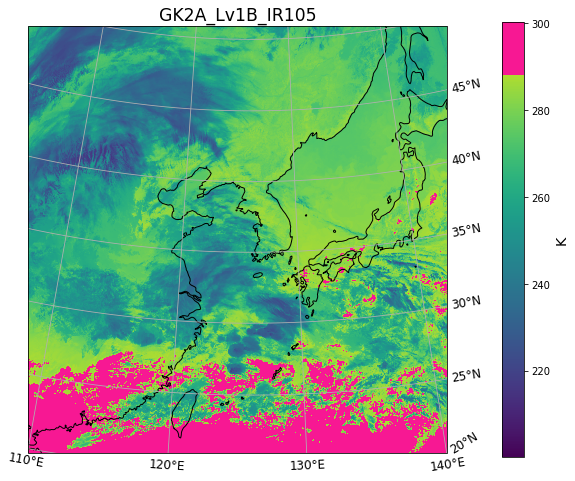

In [93]:
newcmp = ListedColormap(newcolors)

#plot_examples([viridis, newcmp])

fig = plt.figure(figsize=(10,10))

p = ccrs.LambertConformal(central_longitude=126, central_latitude=38.0,globe=None)
ax = plt.axes(projection=p)
cf1 = ax.pcolormesh(lon_arr, lat_arr, data_converted, cmap=newcmp, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([110,140,20,50])
ax.set_title("GK2A_Lv1B_"+channel, size='xx-large')

cbar = plt.colorbar(cf1, orientation="vertical", pad=0.1,shrink=0.8)
cbar.set_label('K', size='x-large')

gl=ax.gridlines(draw_labels=True,x_inline=False, y_inline=False)
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
plt.show()

(256, 4)
(256, 4)


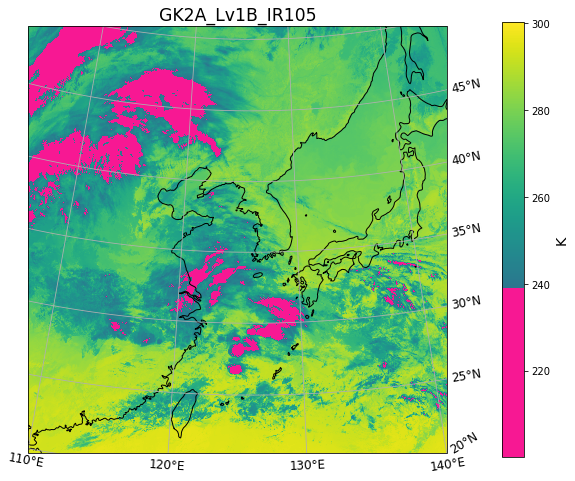

In [94]:
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
print(newcolors.shape)
pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[:100, :] = pink
print(newcolors.shape)
newcmp = ListedColormap(newcolors)

#plot_examples([viridis, newcmp])

fig = plt.figure(figsize=(10,10))

p = ccrs.LambertConformal(central_longitude=126, central_latitude=38.0,globe=None)
ax = plt.axes(projection=p)
cf1 = ax.pcolormesh(lon_arr, lat_arr, data_converted, cmap=newcmp, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([110,140,20,50])
ax.set_title("GK2A_Lv1B_"+channel, size='xx-large')

cbar = plt.colorbar(cf1, orientation="vertical", pad=0.1,shrink=0.8)
cbar.set_label('K', size='x-large')

gl=ax.gridlines(draw_labels=True,x_inline=False, y_inline=False)
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
plt.show()

- 색 이름으로 color map 만들기

https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.colors.LinearSegmentedColormap.html

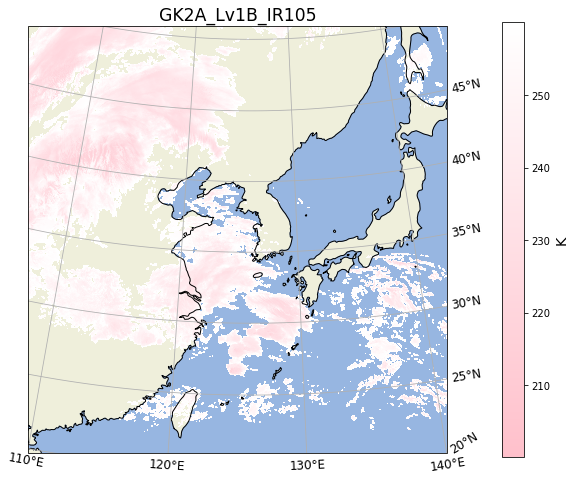

In [95]:
import cartopy.feature as cfeature
newcmp = mcolors.LinearSegmentedColormap.from_list("", ["pink","white"])

fig = plt.figure(figsize=(10,10))

draw=np.where(data_converted>260, np.nan, data_converted)

p = ccrs.LambertConformal(central_longitude=126, central_latitude=38.0,globe=None)
ax = plt.axes(projection=p)
cf1 = ax.pcolormesh(lon_arr, lat_arr, draw, cmap=newcmp, transform=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.set_extent([110,140,20,50])
ax.set_title("GK2A_Lv1B_"+channel, size='xx-large')

cbar = plt.colorbar(cf1, orientation="vertical", pad=0.1,shrink=0.8)
cbar.set_label('K', size='x-large')

gl=ax.gridlines(draw_labels=True,x_inline=False, y_inline=False)
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

plt.show()

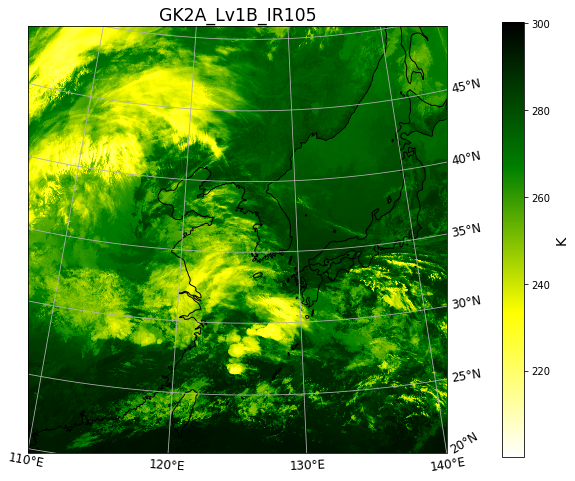

In [96]:
newcmp = mcolors.LinearSegmentedColormap.from_list("", ["white","yellow","green","black"])

fig = plt.figure(figsize=(10,10))

p = ccrs.LambertConformal(central_longitude=126, central_latitude=38.0,globe=None)
ax = plt.axes(projection=p)
cf1 = ax.pcolormesh(lon_arr, lat_arr, data_converted, cmap=newcmp, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([110,140,20,50])
ax.set_title("GK2A_Lv1B_"+channel, size='xx-large')

cbar = plt.colorbar(cf1, orientation="vertical", pad=0.1,shrink=0.8)
cbar.set_label('K', size='x-large')

gl=ax.gridlines(draw_labels=True,x_inline=False, y_inline=False)
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

plt.show()

- 두개의 colar map 섞기

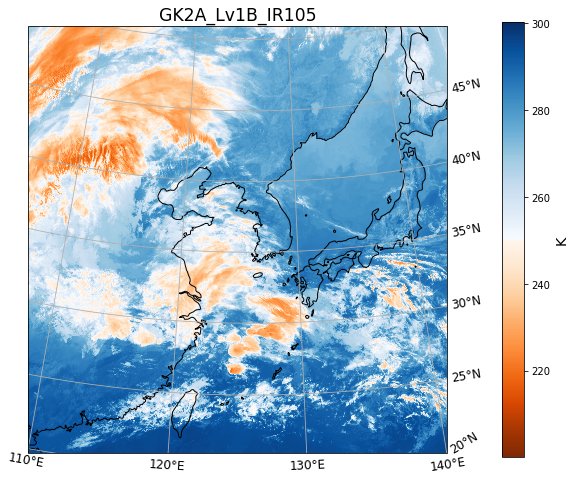

In [97]:
top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')


fig = plt.figure(figsize=(10,10))

p = ccrs.LambertConformal(central_longitude=126, central_latitude=38.0,globe=None)
ax = plt.axes(projection=p)
cf1 = ax.pcolormesh(lon_arr, lat_arr, data_converted, cmap=newcmp, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([110,140,20,50])
ax.set_title("GK2A_Lv1B_"+channel, size='xx-large')

cbar = plt.colorbar(cf1, orientation="vertical", pad=0.1,shrink=0.8)
cbar.set_label('K', size='x-large')

gl=ax.gridlines(draw_labels=True,x_inline=False, y_inline=False)
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

plt.savefig('gk2a_vl1b_ir105.png',dpi=300,pad_inches=0.1,bbox_inces='tight')